# **Polynomial Model**

![Alternative Text](Temporal_Decisions.png)
$$x_1+x_2=x_3$$
$$x_3-x_4^2=x_5$$
$$2x_2+x_4=x_6$$
$$x_5+\sqrt{x_6}-x_7=x_8$$
$$x_8-2(x_9+x_1^3)=x_{10}$$

*The ultimate goal is to determine the percentage of variables that converge into their acceptable ranges based on the order in which the analyses are performed.  The ranges for the alotted variables are given below.  These ranges would act in a similar manner as rules and/or requirements in a vessel design.*

$$1 \leq x_1 < 5$$
$$1 \leq x_2 < 5$$
$$0 \leq x_3 < 8.5$$
$$0.5 \leq x_4 < 6$$
$$-2 \leq x_5 < 9$$
$$1.5 \leq x_6 < 10$$
$$-3.5 \leq x_7 < 4$$
$$-3.5 \leq x_8 < 2.5$$
$$-4 \leq x_9 < 3$$
$$1 \leq x_{10} < 10$$

*The polynomial model runs its analyses in four different orders: (1) 1,2,3,4; (2) 2,3,4,1; (3) 3,4,1,2; and (4) 4,1,2,3.  Each of the runs will start by creating 10,000 different sets of input variables within the ranges shown above, and the other values will be backed out based on the provided equations.  At the end of each of the four runs, all ten variables will be evaluated to see what percentage of the 10 variables fall within their alotted range.  The inputs will always fall within the given range as they are given values randomly within their known bounds.  The outputs will fall within or out of range based on the combination of inputs chosen.  Later on, the code can involve some sort of rework in an attempt to get all of the outputs to stay within their bounds, but for the time being, the code is only meant to show the success rate in convergence for different solution paths.*

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Analysis Functions

*Defining the analysis functions that will be called on later.*

In [2]:
# Analysis 1
def analysis_1(number1, number2):
    number3 = number1 + number2
    return number3

# Analysis 2
def analysis_2(number2, number3, number4):
    number5 = number3 - number4**2
    number6 = 2*number2 + number4
    return number5, number6

# Analysis 3
def analysis_3(number5, number6, number7):
    number8 = number5 + number6**(1/2) - number7
    return number8

# Analysis 4
def analysis_4(number8, number9, number1):
    number10 = number8 - 2*(number9 + number1**3)
    return number10

## Random Inputs

*Assigning random float values to the necessary inputs of each run within the respective variable bounds*

In [3]:
# Create a 10,000 x 10 array of zeros
Run1 = np.zeros((10000, 10))

# Change input bounds for first run (i.e. x1, x2, x4, x7, x9)
for i in range(0,len(Run1)):
    Run1[i,0] = np.random.uniform(1,5)
    Run1[i,1] = np.random.uniform(1,5)
    Run1[i,3] = np.random.uniform(0.5,6)
    Run1[i,6] = np.random.uniform(-3,4)
    Run1[i,8] = np.random.uniform(-4,3)

## Dependent Outputs

*Calling the analysis functions to produce the variable outputs*

In [4]:
# Call each of the analysis functions and update the multi-dimensional arrays with outputs for each run
Run1[:,2] = analysis_1(Run1[:,0], Run1[:,1])
Run1[:,4], Run1[:,5] = analysis_2(Run1[:,1], Run1[:,2], Run1[:,3])
Run1[:,7] = analysis_3(Run1[:,4], Run1[:,5], Run1[:,6])
Run1[:,9] = analysis_4(Run1[:,7], Run1[:,8], Run1[:,0])

## Path Dependency Statitistics

*Calculating the percentage of variables that fall within their given bounds for each set of four runs*

In [5]:
# Create array that tracks successful bounds for each variable
Run1_success = np.zeros(len(Run1[0]))

# Loop through all of the variables checking their bounds for first run
for i in range(0,len(Run1)):
    if Run1[i,0] >= 1 and Run1[i,0] < 5:
        Run1_success[0] += 1
    if Run1[i,1] >=1 and Run1[i,1] < 5:
        Run1_success[1] += 1
    if Run1[i,2] >= 0 and Run1[i,2] < 8.5:
        Run1_success[2] += 1
    if Run1[i,3] >= 0.5 and Run1[i,3] < 6:
        Run1_success[3] += 1
    if Run1[i,4] >= -2 and Run1[i,4] < 9:
        Run1_success[4] += 1
    if Run1[i,5] >= 1.5 and Run1[i,5] < 10:
        Run1_success[5] += 1
    if Run1[i,6] >= -3.5 and Run1[i,6] < 4:
        Run1_success[6] += 1
    if Run1[i,7] >= -3.5 and Run1[i,7] < 2.5:
        Run1_success[7] += 1
    if Run1[i,8] >= -4 and Run1[i,8] < 3:
        Run1_success[8] += 1
    if Run1[i,9] >= 1 and Run1[i,9] < 10:
        Run1_success[9] += 1
    
# Turn successful runs into a percentage for each variable of first run
Run1_success = np.around(Run1_success / len(Run1) * 100, 2)

## Results

*Displaying the results for the four runs*

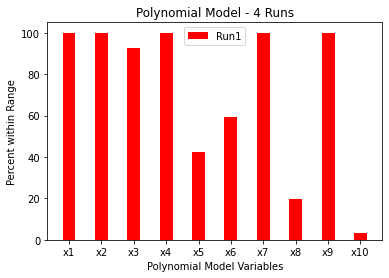

In [6]:
# Create a bar plot for all of the variables of all of the runs
x_data = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
plt.xlabel("Polynomial Model Variables")
plt.ylabel("Percent within Range")
plt.title("Polynomial Model - 4 Runs")
plt.bar(x_data, Run1_success, color ='red', width = 0.4, label='Run1')
plt.legend()